# Inspecting the relation between america's weather and beekeeper's businesses
## Background: Ivry-B (home-made, self-build kit of beehives start-up) is preparing for crowd-funding and have few goals:
## 1. Find if the weather effect the market distrubtion(beekeeper's assoc's) across USA<br>2. Inspect each region beekeeping organizations proportions <br>3. Define market size for each state , to find where to focus the marketing on


## Data: <br>National Centers for Environmental Information (https://www.ncei.noaa.gov/)<br>Beekeeper's organizations leads scraped across the web (view source.txt)

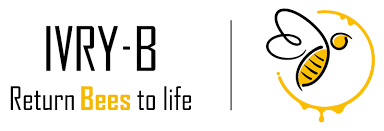# 

In [291]:
import pandas as pd
import seaborn as sns
import numpy as np
from fuzzywuzzy import process
import matplotlib.pyplot as plt

sns.set()
#reading weather data and inspecting
weatherV1 = pd.read_csv(r"C:\Users\iftah\Desktop\data analyst studies\project\Ivry B\weather_usa.csv", header=0)
weatherV1.dtypes
weatherV1.head()

,STATION,NAME,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TSUN,TSUN_ATTRIBUTES
0,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",2019,1256.5,",W",20.0,W,25.6,W,14.4,W,NaN,NaN
1,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",2020,1365.2,",W",20.1,W,25.3,W,14.8,W,NaN,NaN
2,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",2021,1492.2,",W",19.2,W,24.7,W,13.6,W,NaN,NaN
3,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",2022,1274.2,",W",19.5,W,25.0,W,14.0,W,NaN,NaN
4,USW00014735,"ALBANY INTERNATIONAL AIRPORT, NY US",2019,1170.8,",W",9.8,W,15.0,W,4.5,W,NaN,NaN


### Renaming and removing irrelevant information

In [292]:
weather_filtered = pd.DataFrame(weatherV1[['NAME','DATE','PRCP','TAVG','TMAX','TMIN']])
weather_filtered.columns = ['STATE','YEAR','RAIN','avgT','maxT','minT']
weather_filtered['STATE'] = weather_filtered['STATE'].astype('string')
weather_filtered['STATE'] = weather_filtered['STATE'].apply(lambda x: x.split(',')[1].replace('US', '').strip())
print(str(weather_filtered['STATE'].nunique())+"unique states by abbverations: ")
print(weather_filtered['STATE'].unique())

47unique states by abbverations: 
['SC' 'NY' 'TN' 'NC' 'FL' 'MT' 'WY' 'NM' 'MI' 'NE' 'NH' 'ND' 'SD' 'VT'
 'AL' 'MD' 'TX' 'CT' 'ID' 'MA' 'PA' 'AZ' 'NV' 'CA' 'UT' 'CO' 'NJ' 'MN'
 'RI' 'OH' 'MS' 'ME' 'KS' 'WA' 'IL' 'IA' 'AR' 'WI' 'LA' 'KY' 'VA' 'WV'
 'OK' 'IN' 'GA' 'OR' 'MO']


### Inspecting data, visualizing

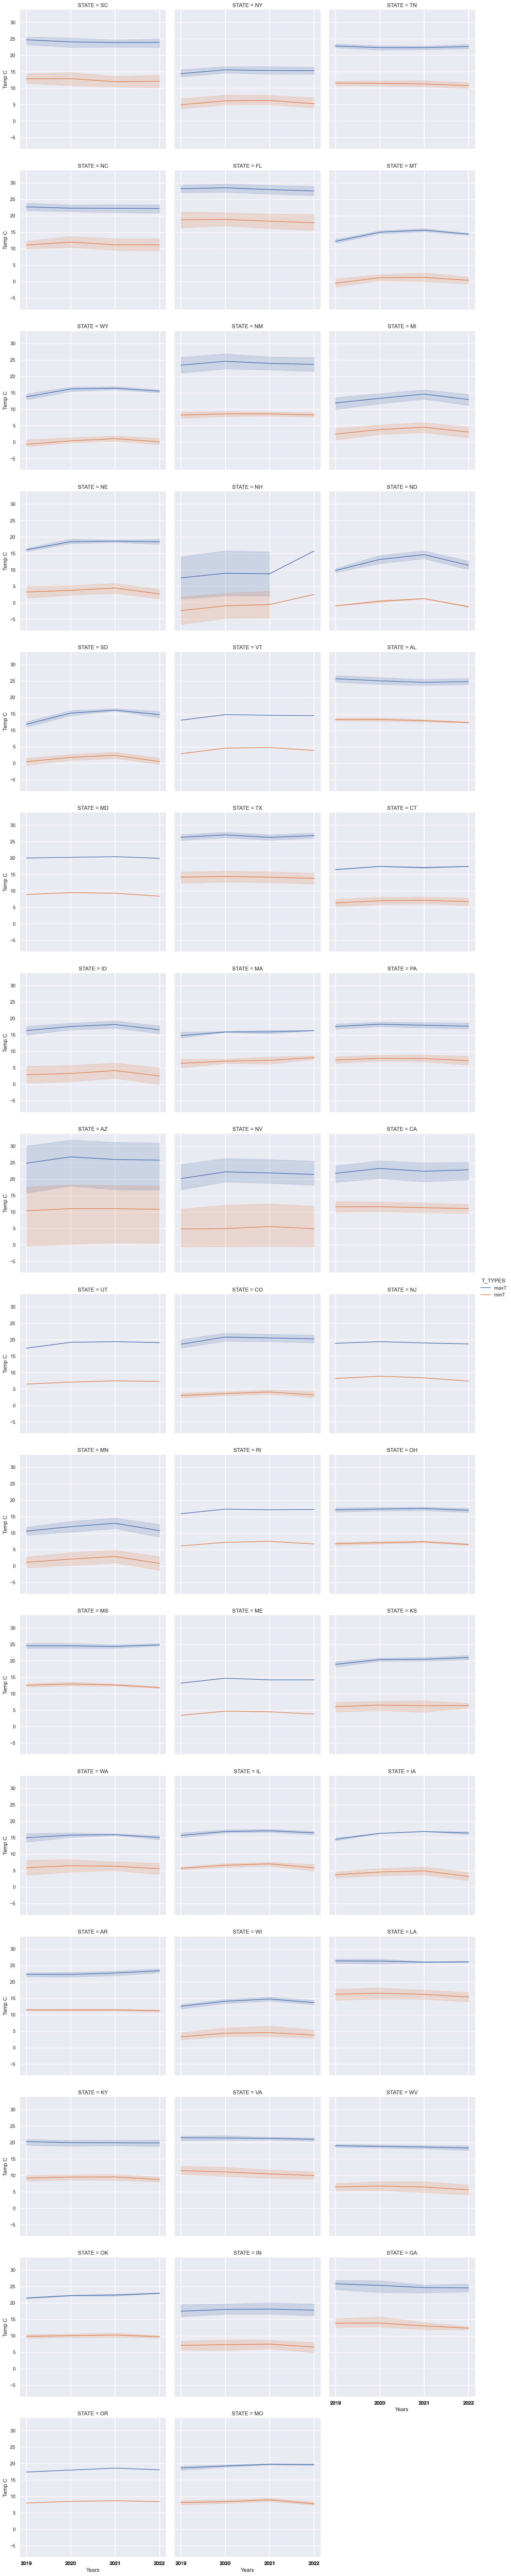

In [293]:
melt_weather = pd.melt(weather_filtered, id_vars=['STATE','YEAR'],value_vars=['maxT','minT'],var_name = 'T_TYPES',value_name='T_VALUES')
melt_weather.head()
g = sns.relplot(data = melt_weather,x='YEAR',y='T_VALUES',hue='T_TYPES', col='STATE', kind='line',col_wrap=3, height=5, aspect=1)
g.set(xlabel="Years",ylabel="Temp C")
plt.xticks(weather_filtered['YEAR'])
plt.show()

### Renaming abbreviations to full names

In [294]:
#sorting and matching state abbreviations with full name for later merge
state_ab = pd.read_csv(r"C:\Users\iftah\Desktop\data analyst studies\project\Ivry B\states_abbreviations.csv")
state_ab.head()
state_ab1 = pd.concat([state_ab[['STATE(TERRITORY)', 'Unnamed: 1']].rename(columns={'STATE(TERRITORY)': 'STATE', 'Unnamed: 1': 'ABBREVIATION'}),
                      state_ab[['STATE(TERRITORY).1', 'Unnamed: 3']].rename(columns={'STATE(TERRITORY).1': 'STATE', 'Unnamed: 3': 'ABBREVIATION'}),
                      state_ab[['STATE(TERRITORY).2', 'Unnamed: 5']].rename(columns={'STATE(TERRITORY).2': 'STATE', 'Unnamed: 5': 'ABBREVIATION'})],
                      ignore_index=True)
state_ab1.set_index('ABBREVIATION', inplace = True)
weather_filtered['STATE'] = weather_filtered['STATE'].apply(lambda x: state_ab1.loc[x][0])
print(str(weather_filtered['STATE'].nunique())+" unique states by full names: ")
print(weather_filtered['STATE'].unique())
weather_filtered.head()

47 unique states by full names: 
['South Carolina' 'New York' 'Tennessee' 'North Carolina' 'Florida'
 'Montana' 'Wyoming' 'New Mexico' 'Michigan' 'Nebraska' 'New Hampshire'
 'North Dakota' 'South Dakota' 'Vermont' 'Alabama' 'Maryland' 'Texas'
 'Connecticut' 'Idaho' 'Massachusetts' 'Pennsylvania' 'Arizona' 'Nevada'
 'California' 'Utah' 'Colorado' 'New Jersey' 'Minnesota' 'Rhode Island'
 'Ohio' 'Mississippi' 'Maine' 'Kansas' 'Washington' 'Illinois' 'Iowa'
 'Arkansas' 'Wisconsin' 'Louisiana' 'Kentucky' 'Virginia' 'West Virginia'
 'Oklahoma' 'Indiana' 'Georgia' 'Oregon' 'Missouri']


,STATE,YEAR,RAIN,avgT,maxT,minT
0,South Carolina,2019,1256.5,20.0,25.6,14.4
1,South Carolina,2020,1365.2,20.1,25.3,14.8
2,South Carolina,2021,1492.2,19.2,24.7,13.6
3,South Carolina,2022,1274.2,19.5,25.0,14.0
4,New York,2019,1170.8,9.8,15.0,4.5


In [295]:
""" another option for applying abbreviation to full name
dict = {}
for a,b in state_ab1.iterrows():
    dict.a=b[0]\
    """

' another option for applying abbreviation to full name\ndict = {}\nfor a,b in state_ab1.iterrows():\n    dict.a=b[0]    '

# Beekeeper's leads

## Importing the leads csv 

In [296]:
#importing the leads gatherd csv
leads_1 = pd.read_csv\
(r"C:\Users\iftah\Desktop\data analyst studies\project\Ivry B\Leads_cleaning\4duplicates remove and merge with other source\1csvleads_merged_cleaned.csv",\
 header=0, dtype = 'string')
#observations with contact name are up-to-date organizatoina
leads_1.head()

,state,organization,site,contact name,function,email
0,alabama,alabama beekeepers association,https://www.alabamabeekeepers.com/,damon wallace,president,damonwallace.beeman@gmail.com
1,alabama,blount county beekeepers association,http://www.k4vb.com/regional associations/blco...,harold deason,president,none
2,alabama,etowah county beekeepers association,http://etowahbeekeepers.org/,wil montgomery,president,nwm@juno.com
3,alabama,jefferson county bee keepers,none,danielle dowell,president,none
4,alabama,walker county beekeepers association,https://www.facebook.com/walker-county-beekeep...,president lonnie,president,funter@otelco.net


### Inspecting the dataframe

In [297]:
print(leads_1['state'].value_counts())
print(leads_1.info())
print(leads_1.describe())

ohio                                        97
none                                        83
texas                                       80
tennessee                                   74
north carolina                              54
michigan                                    49
washington                                  47
florida                                     45
south carolina                              35
virginia                                    32
oregon                                      31
georgia                                     29
pennsylvania                                29
illinois                                    23
new york                                    22
california                                  19
ontario                                     17
kentucky                                    17
maryland                                    15
missouri                                    15
minnesota                                   14
british colum

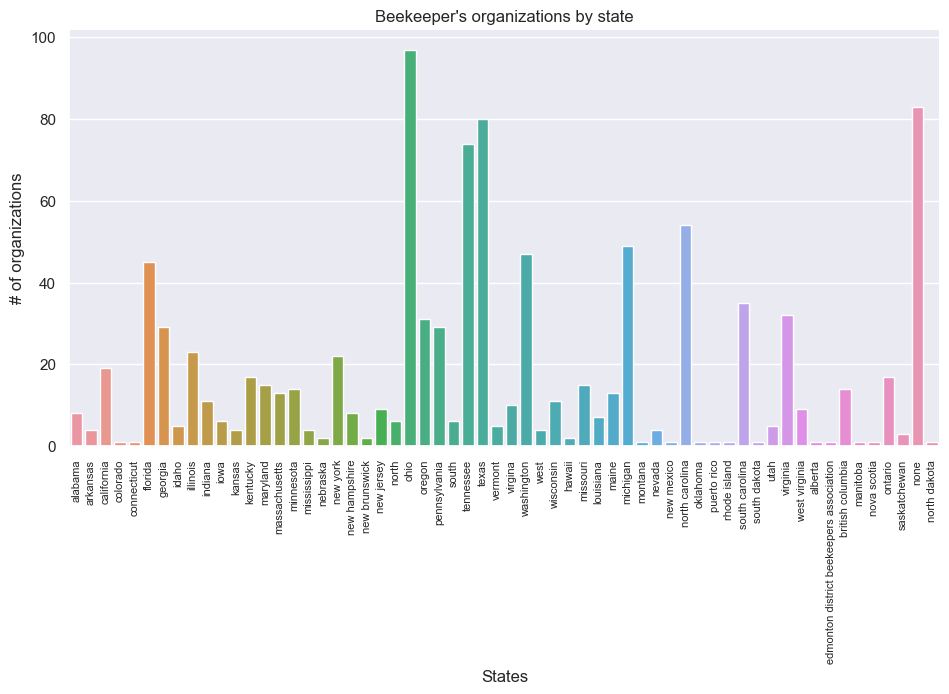

In [298]:
#plotting and inspecting the new dataframe
sns.set_palette("Set3")
g1 = sns.catplot(data = leads_1, kind='count', x='state', height = 5, aspect =2)
g1.set(xlabel="States",  ylabel="# of organizations", title="Beekeeper's organizations by state")
plt.xticks(rotation=90, fontsize=8)
plt.show()
#ohio, texas, and also "none" state observations as high count. "edmonton district..", "south...", "north..." errors.
#will check for duplicates and error in the dataframe

### sorting and filtering leads dataframe for duplicates and errors


In [299]:
print("Number of up-to-date organizations(by valid email): " +str((leads_1['contact name'] != 'none').sum()))
#West values will be replaced to west virginia
leads_1['state'] = leads_1['state'].apply(lambda x: "west virginia" if x=="west" else x)
duplicates = leads_1.loc[(leads_1['organization'].duplicated(keep=False)) | (leads_1['email'].duplicated(keep=False) & (leads_1['email'] != 'none'))].\
sort_values('organization').apply(lambda x: x.str.strip().str.lower())


Number of up-to-date organizations(by valid email): 472


### partly missing information in different fields of the same organz, merge needed, not counting empty emails

In [300]:
duplicates.head()

,state,organization,site,contact name,function,email
220,louisiana,acadiana beekeepers association,http://beelafayette.com/aba/,gina gallucci,none,president@gabeekeeping.com
674,texas,alamo area beekeepers association,www.alamobees.org,rick fink,none,president@alamobees.org
460,texas,alamo area beekeepers association,http://alamobees.org/,rob holliday,none,president@alamobees.org
988,south carolina,anderson county beekeepers association,https://www.andersonbeekeepers.org,tony olekas,president,acbaofsc@gmail.com
108,tennessee,anderson county beekeepers association,none,cathy lowden,president,clowden@comcast.net


In [301]:
# if there is no twin, index error will be catched and handled
# if both email fields are containing @ and not equal, will grab both! email is top priority.
def select_longer_text(x):
    try:
        if x.iloc[0] == "none":
            return x.iloc[1]
        elif x.iloc[1] == "none":
            return x.iloc[0]
        elif ("@" in x.iloc[0]) and ("@" in x.iloc[1]) :
            return (x.iloc[0] + " " + x.iloc[1])
        elif len(x.iloc[0]) >= len(x.iloc[1]):
            return x.iloc[0]
        elif len(x.iloc[0]) < len(x.iloc[1]):
            return x.iloc[1]
    except IndexError:
            return x

### we"ll pick the longer text, and also make sure its not a "none" strings values from each 'twins' using the functing above

In [302]:
mergedTwins = duplicates.groupby('organization', as_index=False).\
agg({'state':select_longer_text, 'contact name':select_longer_text,\
                                                                    'email':select_longer_text, 'site':select_longer_text,\
                                                                    'function':select_longer_text}).sort_values('organization')
#got rid of none, south, north, edmonton organizations values
mergedTwins = mergedTwins.loc[mergedTwins['organization'] != 'none']
print("Number of 'none' states: " + str((mergedTwins['organization']=='none').sum()))

Number of 'none' states: 0


In [303]:
#now well drop the irrelevent observations: duplicates, errors, nones and keep the merged once
leads_1.drop(index = duplicates.index, inplace = True)

In [304]:
#prepre for merge, reorder the merged and append
mergedTwins = mergedTwins[['state', 'organization', 'site', 'contact name', 'function', 'email']]
mergedTwins.head()
leads_filtered = pd.concat([leads_1, mergedTwins]).sort_values(['state', 'organization']).reset_index(drop=True)
leads_filtered.head()

,state,organization,site,contact name,function,email
0,alabama,alabama beekeepers association,https://www.alabamabeekeepers.com/,damon wallace,president,damonwallace.beeman@gmail.com
1,alabama,blount county beekeepers association,http://www.k4vb.com/regional associations/blco...,harold deason,president,none
2,alabama,etowah county beekeepers association,http://etowahbeekeepers.org/,lonnie funderburg,president,nwm@juno.com nwm@juno.com
3,alabama,jefferson county bee keepers,none,danielle dowell,president,none
4,alabama,walker county beekeepers association,https://www.facebook.com/walker-county-beekeep...,president lonnie,president,funter@otelco.net


### inspecting new clean and filtered leads

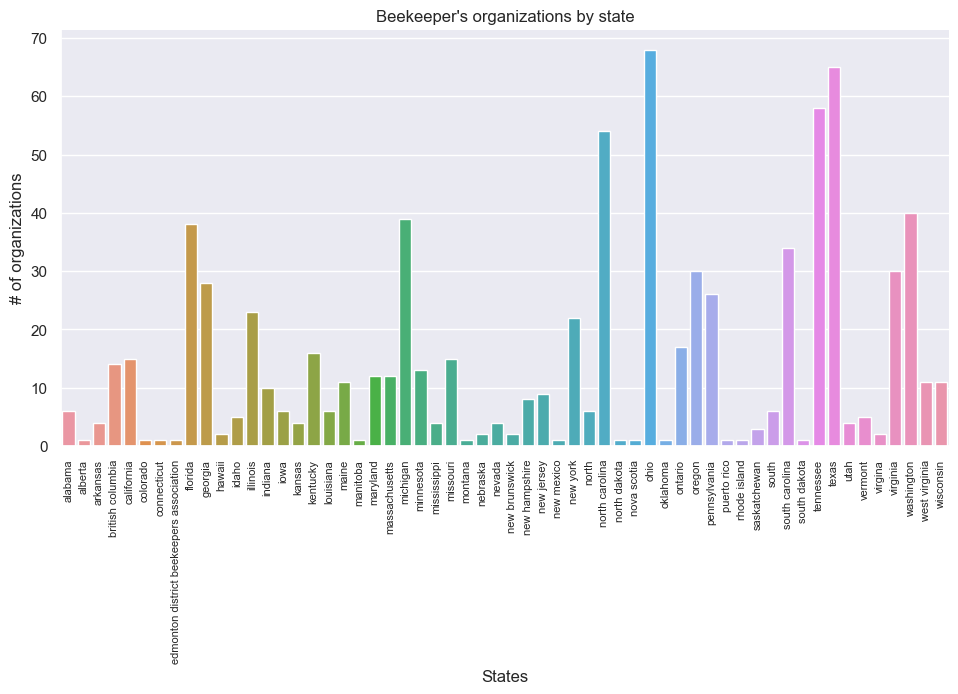

In [305]:
#plotting and inspecting the sorted and filtered
#print(leads_1_clean['state'].value_counts())
#print(leads_1_clean.info())
#print(leads_1_clean.describe())
g2 = sns.catplot(data = leads_filtered, kind='count', x='state', height = 5, aspect =2 )
g2.set(xlabel="States",  ylabel="# of organizations", title="Beekeeper's organizations by state")

plt.xticks(rotation=90, fontsize=8)
plt.show()
#texas and ohio still leading, still contains 'south'/'north' only- will be dropped as they are not valid

In [306]:
errors = leads_filtered.loc[leads_filtered['state'].isin(['north', 'south', 'edmonton district beekeepers association'])]
leads_filtered.drop(index = errors.index, inplace=True)


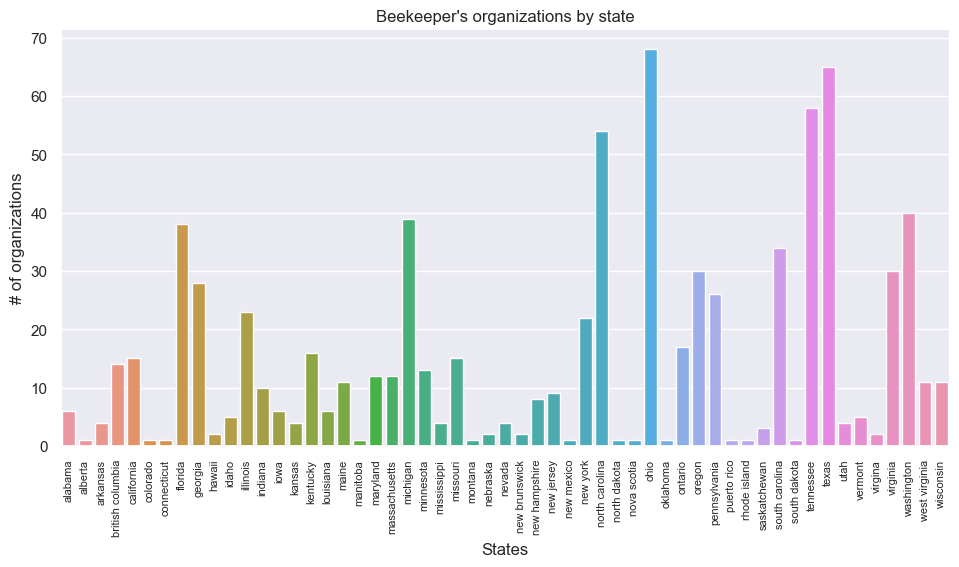

In [307]:
g3 = sns.catplot(data = leads_filtered, kind='count', x='state', height = 5, aspect =2 )
g3.set(xlabel="States",  ylabel="# of organizations", title="Beekeeper's organizations by state")
plt.xticks(rotation=90, fontsize=8)
plt.show()

# starting to inspect relation between weather and beekeeping assoc's count

In [308]:
#merge is optinal, prepring to inspect relations
weather_filtered['STATE'] = weather_filtered['STATE'].str.lower().str.strip()
#getting state count for each observation as a new dataframe for merging(also renamed)
state_count = leads_filtered.groupby('state', as_index=False)['organization'].count().\
rename(columns={leads_filtered.columns[0]: 'STATE', leads_filtered.columns[1]: 'states count'})
#grouping weather data- 4 obesrvations for each state(4 years)
weather_filtered=weather_filtered.groupby(['STATE','YEAR'], as_index=False).\
                agg(RAIN=('RAIN','mean'), avgT=('avgT','mean'))
# merging as a new df of state names, state count, and weather!
weather_assoc = weather_filtered.merge(state_count, on='STATE')
weather_assoc.head(10)
print(str(weather_assoc['STATE'].nunique())+" unique states by full names: ")
print(weather_assoc['STATE'].unique())
weather_filtered.sort_values(['STATE', 'YEAR']).head(15)

45 unique states by full names: 
['alabama' 'arkansas' 'california' 'colorado' 'connecticut' 'florida'
 'georgia' 'idaho' 'illinois' 'indiana' 'iowa' 'kansas' 'kentucky'
 'louisiana' 'maine' 'maryland' 'massachusetts' 'michigan' 'minnesota'
 'mississippi' 'missouri' 'montana' 'nebraska' 'nevada' 'new hampshire'
 'new jersey' 'new mexico' 'new york' 'north carolina' 'north dakota'
 'ohio' 'oklahoma' 'oregon' 'pennsylvania' 'rhode island' 'south carolina'
 'south dakota' 'tennessee' 'texas' 'utah' 'vermont' 'virginia'
 'washington' 'west virginia' 'wisconsin']


,STATE,YEAR,RAIN,avgT
0,alabama,2019,1273.450000,19.500000
1,alabama,2020,1772.950000,19.200000
2,alabama,2021,1617.750000,18.750000
3,alabama,2022,1519.700000,18.600000
4,arizona,2019,386.866667,17.600000
5,arizona,2020,159.233333,18.900000
6,arizona,2021,406.366667,18.466667
7,arizona,2022,268.333333,18.300000
8,arkansas,2019,1644.033333,16.866667
9,arkansas,2020,1541.600000,16.866667


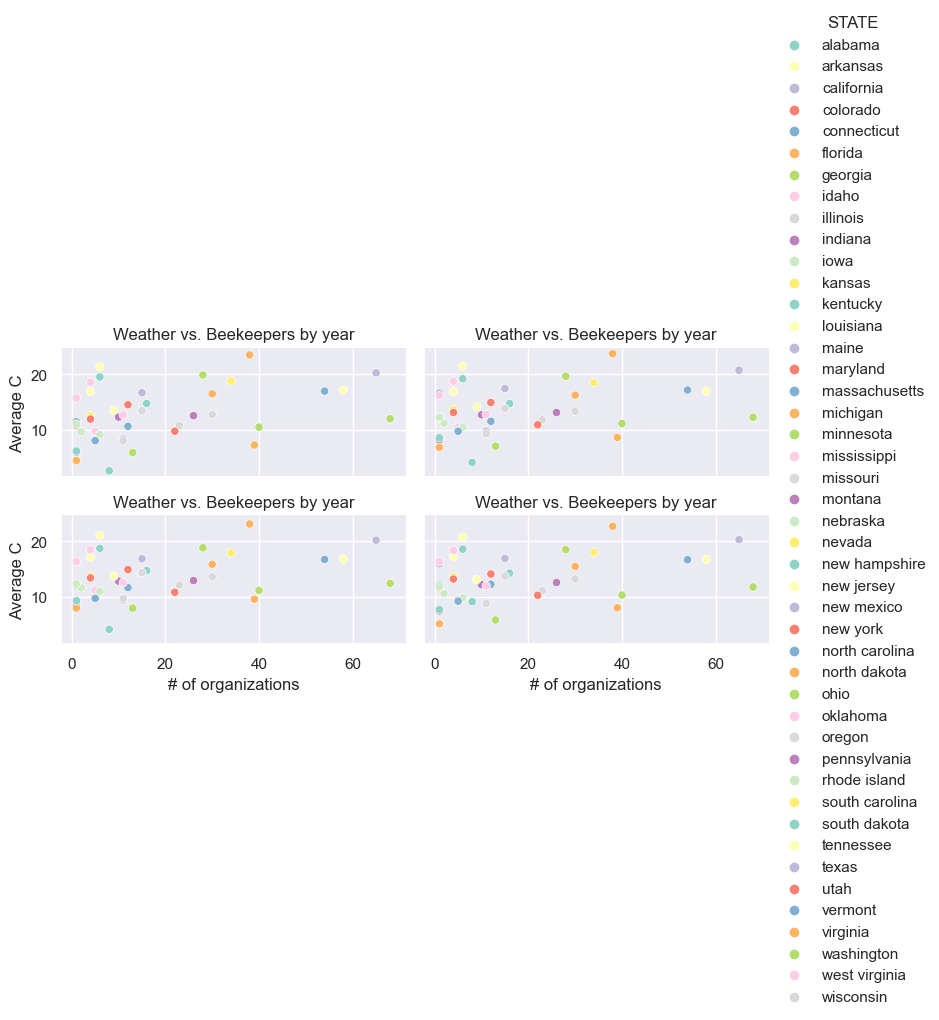

In [309]:
qualitative_colors = sns.color_palette("Set3", weather_assoc.STATE.nunique())

g3 = sns.relplot(data = weather_assoc, x='states count', y='avgT', hue='STATE',\
                 col='YEAR', kind='scatter', height = 2, aspect = 2,col_wrap=2, legend='auto', palette = qualitative_colors)
g3.set(xlabel='# of organizations', ylabel='Average C', title='Weather vs. Beekeepers by year')

plt.show()
#plot is not readable, will group states by their region in america and plot again

### mapping each location to a relevent region

In [310]:
#setting state to region
state_region = {
    'alabama': 'south',
    'alaska': 'west',
    'arizona': 'west',
    'arkansas': 'south',
    'california': 'west',
    'colorado': 'west',
    'connecticut': 'northeast',
    'delaware': 'south',
    'florida': 'south',
    'georgia': 'south',
    'hawaii': 'west',
    'idaho': 'west',
    'illinois': 'midwest',
    'indiana': 'midwest',
    'iowa': 'midwest',
    'kansas': 'midwest',
    'kentucky': 'south',
    'louisiana': 'south',
    'maine': 'northeast',
    'maryland': 'south',
    'massachusetts': 'northeast',
    'michigan': 'midwest',
    'minnesota': 'midwest',
    'mississippi': 'south',
    'missouri': 'midwest',
    'montana': 'west',
    'nebraska': 'midwest',
    'nevada': 'west',
    'new hampshire': 'northeast',
    'new jersey': 'northeast',
    'new mexico': 'west',
    'new york': 'northeast',
    'north carolina': 'south',
    'north dakota': 'midwest',
    'ohio': 'midwest',
    'oklahoma': 'south',
    'oregon': 'west',
    'pennsylvania': 'northeast',
    'rhode island': 'northeast',
    'south carolina': 'south',
    'south dakota': 'midwest',
    'tennessee': 'south',
    'texas': 'south',
    'utah': 'west',
    'vermont': 'northeast',
    'virginia': 'south',
    'washington': 'west',
    'west virginia': 'south',
    'wisconsin': 'midwest',
    'wyoming': 'west'
}

In [311]:
#apply dictinary keys to their value in the dataframe
weather_assoc['region'] = weather_assoc['STATE'].apply(lambda x: state_region[x])
weather_assoc.head()

,STATE,YEAR,RAIN,avgT,states count,region
0,alabama,2019,1273.450000,19.500000,6,south
1,alabama,2020,1772.950000,19.200000,6,south
2,alabama,2021,1617.750000,18.750000,6,south
3,alabama,2022,1519.700000,18.600000,6,south
4,arkansas,2019,1644.033333,16.866667,4,south


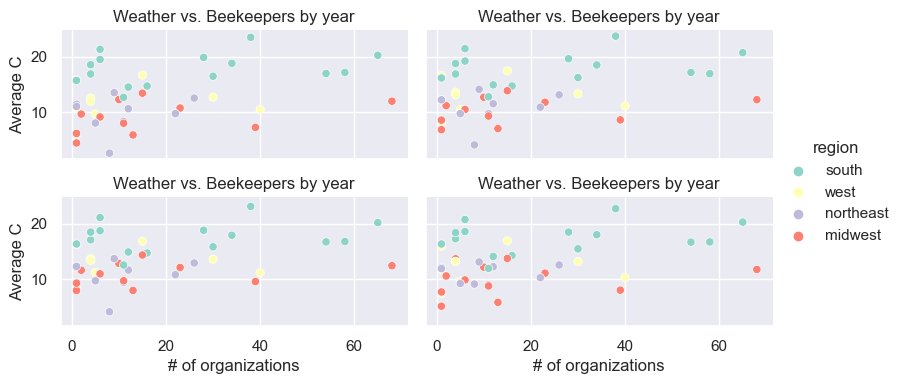

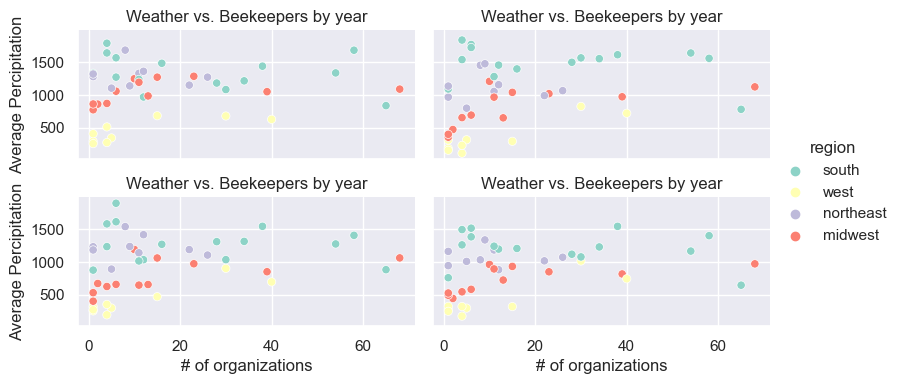

In [312]:
g4 = sns.relplot(data = weather_assoc, x='states count', y='avgT', hue='region',\
                 col='YEAR', kind='scatter', height = 2, aspect = 2,col_wrap=2, legend='auto')
g4.set(xlabel='# of organizations', ylabel='Average C', title='Weather vs. Beekeepers by year')

g5 = sns.relplot(data = weather_assoc, x='states count', y='RAIN', hue='region',\
                 col='YEAR', kind='scatter', height = 2, aspect = 2,col_wrap=2, legend='auto')
g5.set(xlabel='# of organizations', ylabel='Average Percipitation', title='Weather vs. Beekeepers by year')
plt.show()


# objective no. 1: No correlation can be seen between yearly perception/average temparture to beekeeper's organizations amount

# plotting again the states count by region for the relevant USA regions

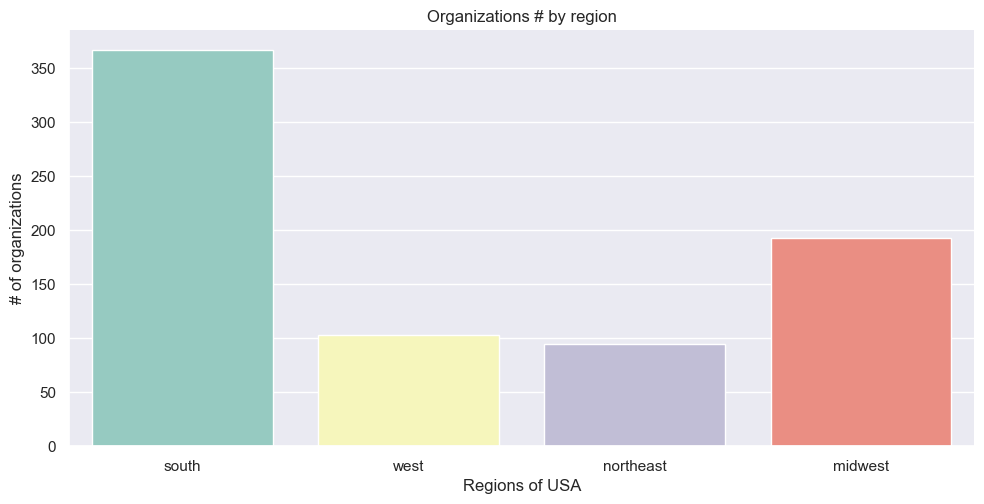

In [313]:
leads_filtered.loc[:, 'region'] = leads_filtered['state'].apply(lambda x: state_region[x] if x in state_region else x)
leads_filtered = leads_filtered.loc[leads_filtered['region'].isin(['west', 'south', 'northeast', 'midwest'])]
g6 = sns.catplot(data = leads_filtered, kind='count', x='region', height = 5, aspect =2 )
g6.set(xlabel='Regions of USA', ylabel='# of organizations', title='Organizations # by region')
plt.show()

# Inspecting regions proportions of organizations to population 

In [314]:
#taken from wikipedia
regions_dict = {'Region': ['south', 'west', 'midwest', 'northeast'],
                'Population':[128716192, 78743364, 68787595, 57040406],
                'Percentage':[38.6, 23.6, 20.6, 17.1]}
regions_pop = pd.DataFrame(regions_dict)
regions_pop.head()

,Region,Population,Percentage
0,south,128716192,38.6
1,west,78743364,23.6
2,midwest,68787595,20.6
3,northeast,57040406,17.1


In [315]:
region_leads = leads_filtered['region'].value_counts(normalize = True).apply(lambda x: round(x, 2))\
.to_frame("% of total(assoc's)").reset_index().rename(columns={'index':'Region'})
print (region_leads)

      Region  % of total(assoc's)
0      south                 0.48
1    midwest                 0.25
2       west                 0.14
3  northeast                 0.13


In [316]:
regions_merged = region_leads.merge(regions_pop, on='Region').rename(columns={'Percentage':'% of total pop'})
regions_merged.head()

,Region,% of total(assoc's),Population,% of total pop
0,south,0.48,128716192,38.6
1,midwest,0.25,68787595,20.6
2,west,0.14,78743364,23.6
3,northeast,0.13,57040406,17.1


## Objective no.2: South and west hold most of the market (difference between midwest and west is minimal, but west is almost half in population. No region seems to be outstanding in proportions.

## Will inspect top 10 states for every region(excluding northeast)

In [317]:
leads_south = leads_filtered.loc[leads_filtered['region'] == 'south']['state'].value_counts().head(5)
leads_midwest = leads_filtered.loc[leads_filtered['region'] == 'midwest']['state'].value_counts().head(5)
leads_west = leads_filtered.loc[leads_filtered['region'] == 'west']['state'].value_counts().head(5)
print("Best states in the south:", ', '.join(leads_south.index.tolist()))
print("Best states in the midwest:", ', '.join(leads_midwest.index.tolist()))
print("Best states in the west:", ', '.join(leads_west.index.tolist()))


Best states in the south: texas, tennessee, north carolina, florida, south carolina
Best states in the midwest: ohio, michigan, illinois, missouri, minnesota
Best states in the west: washington, oregon, california, idaho, nevada


## Objective no.3: Found top 5 states for every region in U.S.A